# [Problem Set 8](http://www.math.vt.edu/people/embree/cmda3606/hw8.pdf) from Prof. Embree's class in numpy

## 1.

We define a true matrix $A$ and a true RHS $b$:

In [1]:
import numpy as np
import scipy.linalg as la

A = np.array([[1., 50.],[0., 0.]])
b = np.array([2, 0])

**Question 1.a**: how can we calculate the pseudo-inverse in this instance?  Why can't we use the
right-inverse formula $A^T(A A^T)^{-1}$ or left-inverse formula $(A^TA)^{-1}A^T$?

In [2]:
import scipy.linalg as la

#Aplus = None # Fix this
U, Sigma, VT = la.svd(A)
print("Sigma", Sigma)
Sigmaplus = np.array([[1./Sigma[0], 0.],[0., 0.]])
Aplus = VT.T.dot(Sigmaplus.dot(U.T))
print("A+", Aplus)

xplus = Aplus.dot(b)
print("x+", xplus)

print("A+ A", Aplus.dot(A))
print("A A+", A.dot(Aplus))

('Sigma', array([ 50.009999,   0.      ]))
('A+', array([[ 0.00039984,  0.        ],
       [ 0.019992  ,  0.        ]]))
('x+', array([ 0.00079968,  0.03998401]))
('A+ A', array([[  3.99840064e-04,   1.99920032e-02],
       [  1.99920032e-02,   9.99600160e-01]]))
('A A+', array([[ 1.,  0.],
       [ 0.,  0.]]))


Now let's build slightly perturbed data $A_\epsilon$ and $b_\epsilon$:

In [3]:
def Aeps(epsilon):
    return np.array([[1., 50.],[0., epsilon]])

print(Aeps(0.01))

def beps(epsilon):
    return np.array([2., epsilon])

print(beps(0.01))

[[  1.00000000e+00   5.00000000e+01]
 [  0.00000000e+00   1.00000000e-02]]
[ 2.    0.01]


**Question 1.b**: write down the formula for $x_\epsilon = A_{\epsilon}^{-1} b_{\epsilon}$, verify that it matches the computed $x_\epsilon$ below.  How does it compare to $x_+$?

$x_\epsilon = (-48, 1)$

In [4]:
def xeps(epsilon):
    return la.solve(Aeps(epsilon),beps(epsilon))

print xeps(1.e-3)

[-48.   1.]


**Question 1.c**: let $\epsilon = 0.01$.  In a cell below, compute the SVD

$$A_\epsilon = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T,$$

and construct the _truncated SVD_ solution to the perturbed problem,

$$x_{SVD-1} = \frac{1}{\sigma_1} v_1 u_1^T b_\epsilon.$$

How does it compare to $x_\epsilon$ and $x_+$?

In [5]:
eps = 1.e-2
Ae = Aeps(eps)
be = beps(eps)
print("Ae", Ae)
Ue, Sigmae, VeT = la.svd(Ae)
print("Sigmae", Sigmae)
Ae_trunc = Ue[:,0:1].dot(VeT[0:1,:])* Sigmae[0]
print("Ae_truc", Ae_trunc)
x_svd_1 = VeT.T[:,0:1].dot(Ue.T[0:1,:].dot(be)) / Sigmae[0]
print("x_svd_1", x_svd_1)


('Ae', array([[  1.00000000e+00,   5.00000000e+01],
       [  0.00000000e+00,   1.00000000e-02]]))
('Sigmae', array([  5.00100000e+01,   1.99960008e-04]))
('Ae_truc', array([[  9.99999960e-01,   5.00000000e+01],
       [  1.99920024e-04,   9.99600160e-03]]))
('x_svd_1', array([ 0.00079968,  0.03998404]))


**Question 1.d**: Suppose $x_\alpha$ solves the least-squares problem

$$x_\alpha = \mathrm{argmin}_x \|\begin{bmatrix}A_\epsilon \\ \sqrt{\alpha} I\end{bmatrix}x - 
\begin{bmatrix} b_\epsilon \\ 0 \end{bmatrix}\|^2$$.

Show that $$x_\alpha = (\alpha I + A_\epsilon^T A_\epsilon)^{-1} A_\epsilon^T b_\epsilon,$$
which is the regularized pseudoinverse discussed in class.

**Question 1.e**: Solve for $x_\alpha$ for values of $\alpha$ logarithmically spaces between $10^{-10}$ and $10^4$.  Produce one `loglog` plot that shows, for each value of $\alpha$, a dot corresponding to $\|A_\epsilon x_\alpha - b_\epsilon\|$ on the x-axis and $\|x_\alpha\|$ on the y-axis.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

solution = []
residual = []

minval = -10
maxval = 4
for e in range(minval,maxval):
    alpha = 10.**e
    x_alpha = la.solve(alpha * np.eye(2) + Ae.T.dot(Ae), Ae.T.dot(be))
    solution.append(la.norm(x_alpha))
    residual.append(la.norm(Ae.dot(x_alpha) - be))
print(zip(solution,residual))
ax = plt.axes()
ax.loglog(np.array(solution),np.array(residual))

for e in range(minval,maxval):
    ax.annotate('(%s)' % 10.**e,xy=(solution[e-minval],residual[e-minval]))
ax.set_xlabel("x norm")
ax.set_ylabel("residual norm")

[(47.890640975984155, 2.3950130435067037e-05), (46.838973413120925, 0.00023424165968740938), (38.40526716661881, 0.0019206463778961788), (13.713396637379683, 0.006858040503324949), (1.846276974662605, 0.009231064804788055), (0.19533796487157895, 0.00956192732935459), (0.04435733918860396, 0.009596322750354477), (0.04003806689095862, 0.009599775939991104), (0.03999234159149733, 0.009600124689644884), (0.03999044640620047, 0.00960048893527713), (0.03997605679445146, 0.009633381450550742), (0.03983277339700626, 0.012474120452059926), (0.03845447679219848, 0.07749054731599521), (0.02856900746205304, 0.5713465560197842)]


**Question 1.f**: Which value of $x_\alpha$ most closely agrees with $x_+$?

## 2.

Read [HW8, Question 2](http://www.math.vt.edu/people/embree/cmda3606/hw8.pdf) from Prof. Embree's class, defining a *blurring kernel* applied to a one-dimensional grayscale "image."  The blurring kernel takes the true image and convolves it with a blurring kernel:

$$ b_{blur}(x) = \int_{0}^1 h(x - y) b_{true}(y) dy.$$

**Ungraded exercise:** Convince yourself that this convolution is a linear operation.  What are the vector spaces?  (**Extra question for those interested in functional analysis**: what are normed linear spaces for which the convolution is bounded [assuming $h$ is like a Gaussian distribution]?)

We can approximate this integral using quadrature and the midpoint rule, giving rise
to the matrix $A_{blur}$ below:

In [7]:
def h_dist(d,z):
    return np.exp(-(d * d) / (z * z)) / (np.sqrt(np.pi) * z)

def h_z(s,t,z):
    return h_dist(s-t,z)

def Ablur(z,n):
    H = (1./n) * np.array([h_dist(float(d)/float(n),z) for d in range(n)])
    return la.toeplitz(H)

Ablur(0.1,3).sum(axis=0)

array([ 1.88066005,  1.88068816,  1.88066005])

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

A = Ablur(0.01,500)

plt.matshow(A, norm=LogNorm(vmin=1.e-16/500., vmax=1./500.))
plt.colorbar()

**2.a**: For each of $z=0.2$, $z=0.1$, and $z=0.05$, create a `loglog` plot showing the singular values of $A_{blur}$ for the three values $n=250$, $n=500$, and $n=1000$.
Describe how the singular values behave as a function of $z$ and $n$.

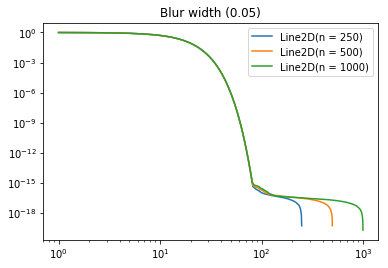

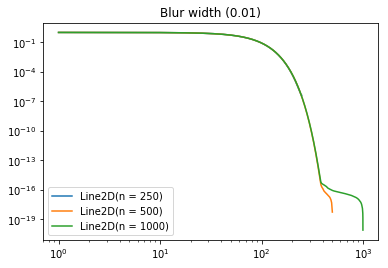

In [9]:
for z in [0.2, 0.1, 0.05, 0.01]:
    handles=[]
    for n in [250, 500, 1000]:
        Azn = Ablur(z,n)
        sigma = la.svd(Azn,compute_uv=False)
        ax = plt.axes()
        handle, = ax.loglog(sigma, label='n = %s' % n)
        handles.append(handle)
    ax.legend(handles)
    ax.set_title('Blur width (%s)' % z)
    plt.show()

Prof. Embree describes the way a UPC string for a product defines a 1D black and white image.  I have written code for this encoding here:

In [10]:
def upc_to_line_widths(upc):
    digit_to_widths = [[3,2,1,1],
                       [2,2,2,1],
                       [2,1,2,2],
                       [1,4,1,1],
                       [1,1,3,2],
                       [1,2,3,1],
                       [1,1,1,4],
                       [1,3,1,2],
                       [1,2,1,3],
                       [3,1,1,2]]
    upcl = [int(d) for d in upc]
    line_widths = [1,1,1]
    line_widths.extend(np.concatenate([digit_to_widths[i] for i in upcl[0:6]]))
    line_widths.extend([1,1,1,1,1])
    line_widths.extend(np.concatenate([digit_to_widths[i] for i in upcl[6:12]]))
    line_widths.extend([1,1,1])
    return line_widths

def line_widths_to_binary(line_widths,sample=None,noise=0.,blur=0.):
    a = []
    b = 1
    for l in line_widths:
        for k in range(l):
            a.append(b)
        b ^= 1
        
    if sample is not None:
        c = [a[int(95. * (x+1./(2.*sample)))] for x in np.linspace(0,1. - 1./sample,num=sample)]
        a = c
    if blur > 0.:
        A = Ablur(blur,len(a))
        a = A.dot(np.array(a))
    if noise > 0.:
        a = np.array(a) * (1. + noise * np.random.randn(len(a)))
    return np.array(a)

def upc_to_binary(upc,sample=None,noise=0.,blur=0.):
    return line_widths_to_binary(upc_to_line_widths(upc),sample=sample,noise=noise,blur=blur)

Here is the encoding of the UPC of a [Georgia Tech tumbler](https://www.amazon.com/s/ref=nb_sb_noss?url=search-alias%3Daps&field-keywords=888633395669&rh=i%3Aaps%2Ck%3A888633395669), sampled at 500 points:

In [11]:
b_gt = upc_to_binary('888633395669',sample=500)
plt.plot(b_gt)

Now here is what a blurry version looks like:

In [12]:
A = Ablur(0.01,500)
b_gt_blur = A.dot(b_gt)
plt.plot(b_gt_blur)

We can add some multiplicative noise (here is 5% noise):

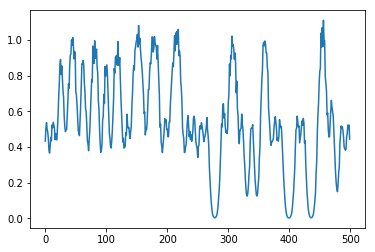

In [13]:
b_gt_noise = b_gt_blur * (1. + 0.05 * np.random.randn(500))
plt.plot(b_gt_noise)

Below is code that tries to take a (non-noisy, non-blurred) image back to its UPC:

In [14]:
def binary_to_line_widths(binary):
    if len(binary) is not 95:
        c = []
        lenb = len(binary)
        for i in range(95):
            start = (i * lenb) / 95
            stop = ((i + 1) * lenb) / 95
            mean = np.mean(binary[start:stop])
            if mean < 0.5:
                c.append(0)
            else:
                c.append(1)
        binary = c 
    a = []
    i = 0
    while i < len(binary):
        bit = binary[i]
        j = i + 1
        while j < len(binary):
            if (binary[j] is not binary[i]):
                break
            j = j + 1
        a.append(j - i)
        i = j
    return(a)

def line_widths_to_upc(line_widths):
    widths_to_digits = {
        (3,2,1,1): 0,
        (1,1,2,3): 0,
        (2,2,2,1): 1,
        (1,2,2,2): 1,
        (2,1,2,2): 2,
        (2,2,1,2): 2,
        (1,4,1,1): 3,
        (1,1,4,1): 3,
        (1,1,3,2): 4,
        (2,3,1,1): 4,
        (1,2,3,1): 5,
        (1,3,2,1): 5,
        (1,1,1,4): 6,
        (4,1,1,1): 6,
        (1,3,1,2): 7,
        (2,1,3,1): 7,
        (1,2,1,3): 8,
        (3,1,2,1): 8,
        (3,1,1,2): 9,
        (2,1,1,3): 9,
    }
    if any(t != 1 for t in line_widths[0:3]):
        raise Exception('Invalid UPC')
    if any(t != 1 for t in line_widths[27:32]):
        raise Exception('Invalid UPC')
    if any(t != 1 for t in line_widths[56:59]):
        raise Error('Invalid UPC')
    inner_lines1 = np.reshape(line_widths[3:27],(6,4))
    inner_lines2 = np.reshape(line_widths[32:56],(6,4))
    inner_lines = np.concatenate([inner_lines1, inner_lines2], axis=0)
    inner_lines = [tuple(i) for i in inner_lines]
    digit_vec = [widths_to_digits[i] for i in inner_lines]
    return ''.join([str(d) for d in digit_vec])

def binary_to_upc(binary):
    return line_widths_to_upc(binary_to_line_widths(binary))

In [15]:
binary_to_upc(b_gt)

'888633395669'

It doesn't work on the blurry or noisy images:

In [16]:
binary_to_upc(b_gt_blur)

Exception: Invalid UPC

In [17]:
binary_to_upc(b_gt_noise)

Exception: Invalid UPC

**Question 2.b**: Try to recover a readable UPC from `b_gt_blur` and `b_gt_noise` using

- A truncated SVD inverse.  How will you choose the value for truncation based on the knowledge of the spectrum you gained in 2.a?

- A regularized inverse.  How will you choose the value for the regularization parameter $\alpha$?

**Question 2.c**: This cell contains the blurry, noisy image of a mystery UPC.  The blurring is the same as above ($z=0.01$), and the noise is 5%.  See if you can recover the mystery UPC and find the product on amazon.

In [18]:
b_noisy = np.array([ 0.43329842,  0.49470105,  0.51774949,  0.54915502,  0.4687909 ,
        0.41046195,  0.41778286,  0.3562935 ,  0.38387937,  0.39263823,
        0.43643779,  0.49313035,  0.51998207,  0.55564229,  0.57268167,
        0.57399523,  0.5163663 ,  0.47395633,  0.46369396,  0.49350626,
        0.53796667,  0.6506247 ,  0.67919525,  0.8000904 ,  0.89192648,
        0.9070556 ,  0.93409993,  0.92094453,  0.99130139,  1.00482311,
        0.93009402,  0.97295186,  0.87032677,  0.77485271,  0.79712164,
        0.72763963,  0.64290323,  0.54434084,  0.47937512,  0.47267414,
        0.50453346,  0.51719474,  0.60556416,  0.74135361,  0.73420997,
        0.86168408,  0.9292857 ,  0.78953358,  0.91719357,  0.73172739,
        0.75495546,  0.65457571,  0.5844915 ,  0.4830258 ,  0.3700438 ,
        0.26013415,  0.19314435,  0.15932991,  0.16388106,  0.1831882 ,
        0.23561961,  0.29965826,  0.42744974,  0.48891401,  0.46211261,
        0.57301339,  0.53591822,  0.45122278,  0.40425903,  0.30400093,
        0.25018749,  0.17489082,  0.11889305,  0.12039955,  0.13201889,
        0.18668068,  0.24289365,  0.34947739,  0.4653066 ,  0.52765042,
        0.65502853,  0.75258442,  0.84513069,  0.81823952,  0.87066078,
        0.74890576,  0.72926269,  0.63599274,  0.59063086,  0.48563806,
        0.43880318,  0.38156822,  0.34646744,  0.41705788,  0.46058151,
        0.50148717,  0.55742105,  0.47997178,  0.54872235,  0.490978  ,
        0.38494087,  0.30987191,  0.22136485,  0.1616725 ,  0.10300749,
        0.05644664,  0.03651487,  0.0253935 ,  0.02502381,  0.03388441,
        0.06040273,  0.09815685,  0.15834464,  0.24329459,  0.34169687,
        0.44356733,  0.63954507,  0.63236134,  0.71063641,  0.69257417,
        0.87049519,  0.782626  ,  0.81610675,  0.68649047,  0.61638939,
        0.64882557,  0.4995875 ,  0.43919324,  0.37869946,  0.39419848,
        0.43855807,  0.47494521,  0.59845995,  0.68841829,  0.67547145,
        0.90666719,  0.88874917,  0.90248832,  0.91845733,  1.02161047,
        1.01737155,  0.93517923,  1.08014868,  1.04673279,  0.94932836,
        0.97566063,  0.94849818,  0.91700469,  0.92099465,  0.83997019,
        0.76499878,  0.70138408,  0.63845121,  0.51033572,  0.4929475 ,
        0.49542463,  0.47322845,  0.5014642 ,  0.47741564,  0.56513002,
        0.56576239,  0.55928417,  0.52199096,  0.46706896,  0.46114486,
        0.48818279,  0.49767359,  0.54076866,  0.59033994,  0.68993429,
        0.71503868,  0.8754766 ,  0.81734346,  0.93267665,  0.7787679 ,
        0.79299829,  0.77196801,  0.70799179,  0.55202137,  0.52577024,
        0.50090052,  0.42265733,  0.49104947,  0.57402819,  0.60323025,
        0.68410156,  0.75782253,  0.88771567,  0.73725294,  0.89396931,
        1.03726874,  0.96096313,  0.92288243,  0.93153496,  0.94560845,
        0.94978364,  0.81942242,  0.72530675,  0.62347831,  0.54282272,
        0.42464861,  0.33297091,  0.24938321,  0.1858315 ,  0.13532491,
        0.11670223,  0.11867775,  0.17651532,  0.23175542,  0.29078762,
        0.39393716,  0.48094643,  0.4790721 ,  0.55342605,  0.49322452,
        0.44071187,  0.41809031,  0.32364868,  0.23185764,  0.1871343 ,
        0.16252266,  0.15965045,  0.18117083,  0.26853271,  0.33839094,
        0.44595964,  0.54989049,  0.59845483,  0.8025217 ,  0.82401517,
        0.85906081,  0.83612086,  0.83672107,  0.79947164,  0.7851989 ,
        0.6924133 ,  0.64055694,  0.51589836,  0.47016126,  0.47460812,
        0.48831085,  0.51513981,  0.52270293,  0.53975935,  0.49353597,
        0.52058756,  0.48492292,  0.44984556,  0.39801079,  0.3927449 ,
        0.38533643,  0.42742615,  0.44820487,  0.49072958,  0.50133682,
        0.53708052,  0.55878717,  0.50824383,  0.50945099,  0.45002718,
        0.49547649,  0.48594943,  0.52139463,  0.63687399,  0.71455029,
        0.68191112,  0.89402872,  0.86693714,  0.90348679,  0.86903481,
        1.02147609,  1.05921293,  1.09709803,  0.90352449,  0.93381811,
        0.87483983,  0.77853409,  0.68106081,  0.64742885,  0.53136006,
        0.45602347,  0.48594203,  0.47687793,  0.48470333,  0.53523555,
        0.54938895,  0.48554457,  0.55604864,  0.45689203,  0.39237679,
        0.31624939,  0.21047032,  0.17672119,  0.14101123,  0.12005873,
        0.12314259,  0.17130195,  0.23839322,  0.35013171,  0.43855616,
        0.61045428,  0.68049989,  0.80309078,  0.83932634,  0.85397383,
        0.919631  ,  0.88195435,  0.80809605,  0.67918208,  0.61931051,
        0.55291367,  0.42934893,  0.33968129,  0.23592644,  0.20965422,
        0.15615191,  0.16810328,  0.19159159,  0.26168137,  0.36106864,
        0.42158804,  0.5134018 ,  0.62027448,  0.7879766 ,  0.78430381,
        0.87694692,  0.93956928,  0.83606318,  0.81439199,  0.71748746,
        0.74726857,  0.6315496 ,  0.51653314,  0.50247723,  0.44264003,
        0.5324184 ,  0.48408671,  0.59744766,  0.73722982,  0.82547707,
        0.87463645,  0.8724443 ,  0.90525767,  0.91899448,  0.95936677,
        0.97665688,  1.0329723 ,  0.93094277,  0.89837859,  0.84942977,
        0.82999622,  0.76407034,  0.59609967,  0.55293999,  0.45586547,
        0.46713618,  0.44950075,  0.49615638,  0.50441573,  0.53101487,
        0.5518105 ,  0.52707406,  0.48656861,  0.37711476,  0.30515797,
        0.23514409,  0.16750305,  0.13595817,  0.1228032 ,  0.13681066,
        0.18368409,  0.23476556,  0.29625193,  0.35809093,  0.46923197,
        0.47842635,  0.53215897,  0.52806344,  0.50848692,  0.45287672,
        0.46029249,  0.46084676,  0.46144044,  0.54235899,  0.61301126,
        0.7134241 ,  0.81917139,  0.84441196,  0.87751218,  0.96028569,
        0.96632907,  0.89845539,  0.95374144,  0.9112262 ,  0.99434661,
        0.83786304,  0.77639926,  0.72397668,  0.63231624,  0.58248176,
        0.4430129 ,  0.34626934,  0.24073644,  0.18067686,  0.13085909,
        0.12451411,  0.1203064 ,  0.16688872,  0.25707924,  0.35881004,
        0.46791945,  0.54421819,  0.71227468,  0.75948306,  0.72863323,
        0.83341544,  0.8974575 ,  0.72815951,  0.79923227,  0.64305186,
        0.55424993,  0.52607259,  0.48187577,  0.4919142 ,  0.47044454,
        0.53537906,  0.55975999,  0.72440653,  0.76181264,  0.88200213,
        0.8875604 ,  0.87819914,  0.90252992,  0.84318608,  0.77670928,
        0.62819956,  0.55697162,  0.43150077,  0.33293455,  0.24712526,
        0.18569978,  0.16689526,  0.15344453,  0.18971208,  0.28435878,
        0.35653599,  0.44380229,  0.51028562,  0.69711194,  0.7788631 ,
        0.75872362,  0.83041697,  0.8336056 ,  0.86028024,  0.84819725,
        0.78003746,  0.69392868,  0.4647221 ,  0.46494457,  0.33270962,
        0.27308701,  0.1804103 ,  0.16630553,  0.16004787,  0.19191542,
        0.28654914,  0.35612439,  0.45572083,  0.51522607,  0.66375922,
        0.7755822 ,  0.81689489,  0.98545805,  0.89459017,  0.89685812,
        0.83787251,  0.77147351,  0.66590107,  0.57801505,  0.5088366 ,
        0.5038924 ,  0.48152047,  0.43231902,  0.54042156,  0.47253793,
        0.50200938,  0.57002951,  0.50865485,  0.47769562,  0.44011174,
        0.40733464,  0.37138999,  0.34723915,  0.34974391,  0.45167436,
        0.47083001,  0.53552174,  0.49148713,  0.5479734 ,  0.48053639])

plt.plot(b_noisy)